C:\Users\scho_dv\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3,6,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


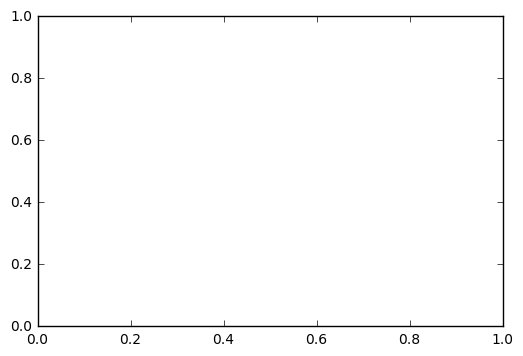

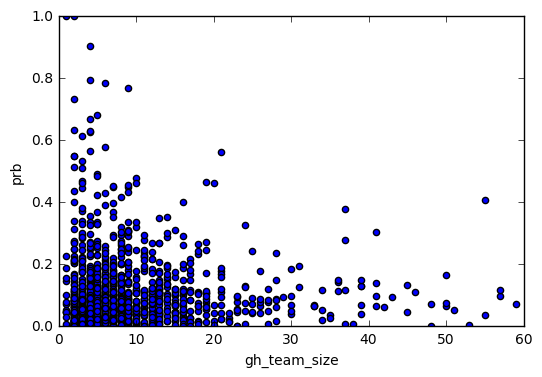

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH_TO_DATA='C:/Users/scho_dv/Documents/travistorrent_11_1_2017.csv/travistorrent_11_1_2017.csv'
SEPERATOR=','
TR_BUILD_ID='tr_build_id'
GH_PROJECT_NAME='gh_project_name'
GH_TEAM_SIZE='gh_team_size'
TR_LOG_STATUS='tr_log_status'
BROKEN_BUILD_AVG='broken_build_prb'

df = pd.read_csv(PATH_TO_DATA, sep=SEPERATOR)
df_cleaned = df[[TR_BUILD_ID, GH_PROJECT_NAME, GH_TEAM_SIZE, TR_LOG_STATUS]]

df1_project_name_team_size = df_cleaned[[GH_PROJECT_NAME, GH_TEAM_SIZE]]

df2 = df_cleaned.drop_duplicates(TR_BUILD_ID, keep='last')
df2 = df2.sort_values(GH_TEAM_SIZE, ascending=False)

all_build_count_df2 = df2.groupby(GH_PROJECT_NAME).size()

df3 = df2.loc[df_cleaned[TR_LOG_STATUS] == 'broken']

all_broken_build_count_df3 = df3.groupby(GH_PROJECT_NAME).size()
all_projects_avg = all_broken_build_count_df3 / all_build_count_df2

all_projects_avg = all_projects_avg.fillna(0)
all_projects_avg = all_projects_avg.reset_index(name='prb')

final_merge = pd.merge(all_projects_avg, df1_project_name_team_size, how='left', on=GH_PROJECT_NAME)
final_merge = final_merge.sort_values(GH_TEAM_SIZE)
final_merge = final_merge.drop_duplicates(GH_PROJECT_NAME, keep='last')
final_merge = final_merge.loc[final_merge[GH_TEAM_SIZE] < 200]

plot = final_merge.plot.scatter(x='gh_team_size',y='prb')
plt.show()
    

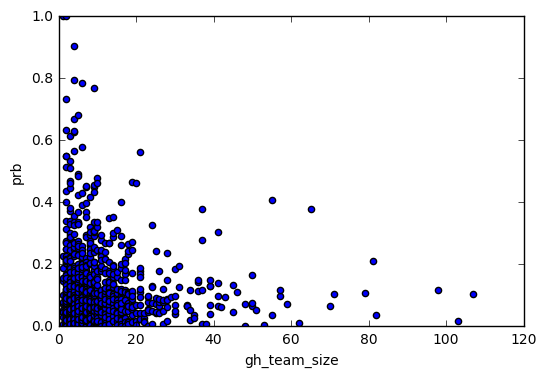

In [67]:
plot = final_merge.plot.scatter(x='gh_team_size',y='prb')
plt.axis([0, 120, 0, 1.0])
plt.show()